#  Supervised Learning Assignment
###  Decision Tree Analysis

####  S. Parker 2016

This notebook will examine the phishing dataset with decision trees.  It will look at the effectiveness of the decision trees relative to:

*  Levels in the decision tree
*  Number of training samples
*  Bias vs variance calculations
*  Performance metrics (memory used, time to fit, time to predict)

Also explored will be the effect of pre-pruning the data set and how this affects performance.

In [1]:
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.externals.six import StringIO  
import pandas as pd
import pydotplus
import numpy as np
import os, sys
import timeit
from IPython.display import display, HTML
from IPython.display import Image 
import matplotlib.pyplot as plt
%matplotlib inline
import arff

from supervised_learning import *

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

####  Control variables for simulation

In [2]:
training_test_split = .65

####  Helper function to allow us to get the size of the learning model

In [3]:
import sys
from numbers import Number
from collections import Set, Mapping, deque

try: # Python 2
    zero_depth_bases = (basestring, Number, xrange, bytearray)
    iteritems = 'iteritems'
except NameError: # Python 3
    zero_depth_bases = (str, bytes, Number, range, bytearray)
    iteritems = 'items'

def getsize(obj_0):
    """Recursively iterate to sum size of object & members."""
    def inner(obj, _seen_ids = set()):
        obj_id = id(obj)
        if obj_id in _seen_ids:
            return 0
        _seen_ids.add(obj_id)
        size = sys.getsizeof(obj)
        if isinstance(obj, zero_depth_bases):
            pass # bypass remaining control flow and return
        elif isinstance(obj, (tuple, list, Set, deque)):
            size += sum(inner(i) for i in obj)
        elif isinstance(obj, Mapping) or hasattr(obj, iteritems):
            size += sum(inner(k) + inner(v) for k, v in getattr(obj, iteritems)())
        # Check for custom object instances - may subclass above too
        if hasattr(obj, '__dict__'):
            size += inner(vars(obj))
        if hasattr(obj, '__slots__'): # can have __slots__ with __dict__
            size += sum(inner(getattr(obj, s)) for s in obj.__slots__ if hasattr(obj, s))
        return size
    return inner(obj_0)

##  Load and prepare training set #1

For this assignment I choose the following two data sets:
    
*  Phishing data set - looks at various attributes of a website address and compute whether the site if a phishing site or not

In [4]:
df_training, df_testing = loadSpamDataSet()
dataset = "SPAM Datast"

#df_training, df_testing = loadPhishingDataSet()
#dataset = "Spam"

##  Vary Decision Tree Depth to see effect on training and testing sets

In [5]:
clf = svm.SVC()

In [6]:
clf.fit(df_training.values[:,0:-1], df_training.values[:,-1])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

rbf


SVM Kernel,Training Set Accuracy,Testing Set Accuracy,Fit Runtime (ms),Predict Runtime (ms),Memory Usage (bytes)
rbf,0.940803,0.665217,4514.202056,1917.34758,1020974


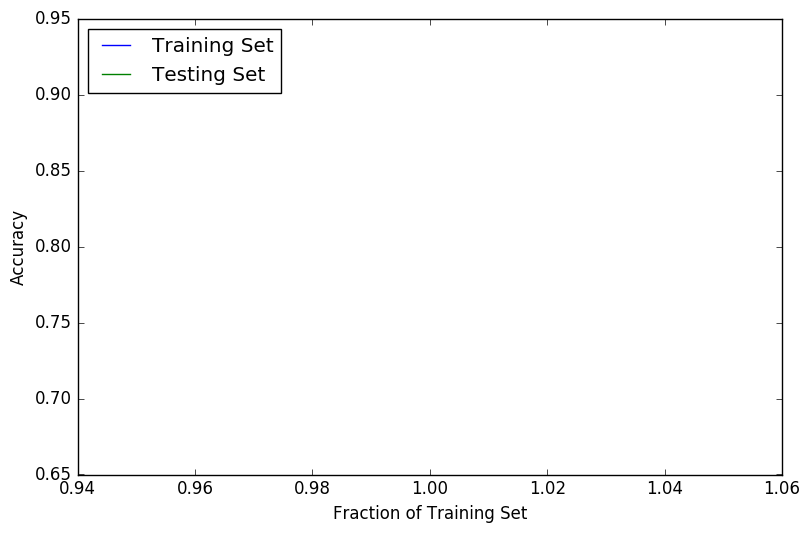

In [8]:
training_accuracy = []
testing_accuracy = []
fit_run_time = []
predict_run_time= []
memory_usage = []

percent_of_training_data = [1.0]

#kernels = ["rbf", "poly", "linear"]
kernels = ["rbf"]


for kernel in kernels:
    print(kernel)
    new_training_accuracy = []
    new_testing_accuracy = []
    for percent in percent_of_training_data:
        clf = svm.SVC(kernel = kernel)
        
        fit_run_time.append(timeit.timeit("clf.fit(df_training.values[:,0:-1], df_training.values[:,-1])", 
              "from __main__ import clf, df_training",
               number = 5))
        
        clf.fit(df_training.values[0:int(percent * len(df_training)),0:-1], \
                df_training.values[0:int(percent * len(df_training)),-1])
    
        memory_usage.append(getsize(clf))
    
        new_training_accuracy.append(clf.score(df_training.values[:,0:-1], df_training.values[:,-1]))
        new_testing_accuracy.append(clf.score(df_testing.values[:,0:-1], df_testing.values[:,-1]))
    
    predict_run_time.append(timeit.timeit("clf.score(df_testing.values[:,0:-1], df_testing.values[:,-1])",
                                          "from __main__ import clf, df_testing",
                                          number=5))
    
    training_accuracy.append(new_training_accuracy)
    testing_accuracy.append(new_testing_accuracy)


plt.rcParams.update({'font.size': 12})    
fig = plt.figure(figsize=(20,20))    
    
plt.subplot(321)

for i, kernel in enumerate(kernels):
    plt.plot(percent_of_training_data, training_accuracy[i])
    plt.plot(percent_of_training_data, testing_accuracy[i])

plt.xlabel("Fraction of Training Set")
plt.ylabel("Accuracy")
plt.legend(["Training Set", "Testing Set"], loc=2)


if dataset == "Spam":
    df_results = pd.DataFrame()
    df_results["SVM Kernel"] = kernels
    df_results["Training Set Accuracy"] = [training_accuracy[0][0], training_accuracy[1][0], training_accuracy[2][0]]
    df_results["Testing Set Accuracy"] = [testing_accuracy[0][-1], testing_accuracy[1][-1], testing_accuracy[2][-1]]
    df_results["Fit Runtime (ms)"] = [fit_run_time[0]*1000, fit_run_time[1]*1000, fit_run_time[2]*1000]
    df_results["Predict Runtime (ms)"] = [predict_run_time[0]*1000, predict_run_time[1]*1000, predict_run_time[2]*1000]
    df_results["Memory Usage (bytes)"] = [memory_usage[0], memory_usage[1], memory_usage[2]]
    display(HTML(df_results.to_html(index=False)))
else:
    df_results = pd.DataFrame()
    df_results["SVM Kernel"] = kernels
    df_results["Training Set Accuracy"] = [training_accuracy[0][0]]
    df_results["Testing Set Accuracy"] = [testing_accuracy[0][-1]]
    df_results["Fit Runtime (ms)"] = [fit_run_time[0]*1000]
    df_results["Predict Runtime (ms)"] = [predict_run_time[0]*1000]
    df_results["Memory Usage (bytes)"] = [memory_usage[0]]
    display(HTML(df_results.to_html(index=False)))


In [ ]:
df_results = pd.DataFrame()
df_results["SVM Kernel"] = kernels
df_results["Training Set Accuracy"] = [training_accuracy[0][0], training_accuracy[1][0], training_accuracy[2][0]]
df_results["Testing Set Accuracy"] = [testing_accuracy[0][-1], testing_accuracy[1][-1], testing_accuracy[2][-1]]
df_results["Fit Runtime (ms)"] = [fit_run_time[0]*1000, fit_run_time[1]*1000, fit_run_time[2]*1000]
df_results["Predict Runtime (ms)"] = [predict_run_time[0]*1000, predict_run_time[1]*1000, predict_run_time[2]*1000]
df_results["Memory Usage (bytes)"] = [memory_usage[0], memory_usage[1], memory_usage[2]]
display(HTML(df_results.to_html(index=False)))

In [ ]:
df_results["Training Set Accuracy"] = [int(training_accuracy[0][0]), int(training_accuracy[1][0]), int(training_accuracy[2][0])]